In [1]:
import numpy as np
import matplotlib.pyplot as plt

Unidade Astronômica $= 1,5 \cdot 10^8 km$<br>
Massa da Terra $= 5,972 \cdot 10^{24} kg$<br>
Massa do Sol $ = 1,989 \cdot 10^{30} kg$<br>
Constante Gravitacional = $6.67408 \cdot 10^{-11} m^{3} kg^{-1} s^{-2}$

$$
F = ma
$$

$$
F = G\frac{m_1m_2}{||r^2||}
$$

\begin{align}
m_1\ddot{r} &= G\frac{m_1m_2}{||r^2||}\\
\end{align}
Com $r = |x_1 - x_2|$, como queremos o vetor na direção do astro, vamos multiplicar pelo unitario de r

$$
m_1\ddot{r} = G\frac{m_1m_2}{||r^2||}\frac{r}{||r||}
$$

$$
m_1\ddot{r} = G\frac{r m_1m_2}{||r^3||}
$$

In [125]:
u = [1,0,0,0,0.1,0.2,0,0]
du = [u[2],u[3],G*m[1]*(u[4]-u[0])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2), G*m[0]*(u[5]-u[1])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2),u[6],u[7],G*m[0]*(u[4]-u[0])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2),G*m[1]*(u[5]-u[1])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2)]
m = [1.989*10**6,5.972]
G = 6.67408

In [126]:
def F(u,t):
    return np.array([u[2],u[3],G*m[1]*(u[4]-u[0])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2), G*m[0]*(u[5]-u[1])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2),u[6],u[7],G*m[0]*(u[4]-u[0])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2),G*m[1]*(u[5]-u[1])/np.sqrt((u[4]-u[0])**2 + (u[5]-u[1])**2)])

In [127]:
def rk_2(F, y0, ts):
    ys = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = F(ys[-1], t)
        k2 = F(ys[-1] + h*k1,tnext)
        ynext = ys[-1] + h * (k1+k2) / 2.0
        ys.append(ynext)
        t = tnext
    return np.array(ys[:-1])

In [128]:
ts = np.linspace(-25000,25000,3000)
ys = rk_2(F,u,ts)
len(ys)

3000

In [129]:
y[2][1]

7.358404027576109

In [130]:
x1 = [i[0] for i in ys]
y1 = [i[1] for i in ys]
x2 = [i[4] for i in ys]
y2 = [i[5] for i in ys]

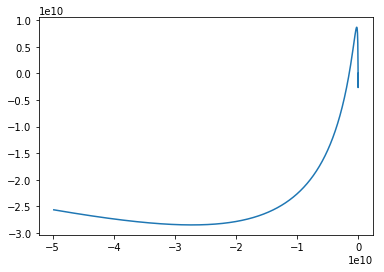

In [133]:
plt.plot(x1,y1)

In [154]:
m = [1.989*10**30,5.972*10**24]
G = 6.67408*10**(-11)
d = 1.5*10**(8)

In [159]:
def model(r,t):
    vdot,v = r
    return [v,G * m[0]/r[0]**2]

In [160]:
model([2,3],5)

[3, 3.31868628e+19]

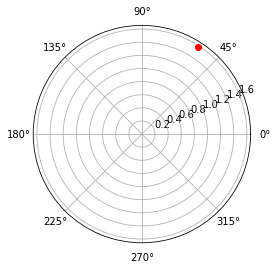

In [166]:
plt.polar(1,np.pi/2,'ro')
plt.show()

In [195]:
def G(p):
    return [1]*500

In [196]:
ps = np.linspace(0,2*np.pi,500)

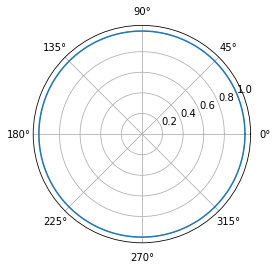

In [197]:
plt.polar(ps,G(ps))

In [198]:
def X(p):
    return 2*np.cos(p)
def Y(p):
    return 2*np.sin(p)

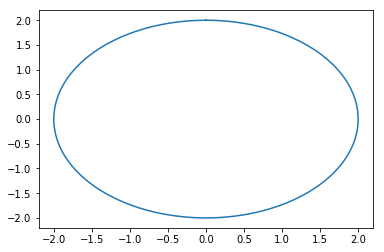

In [200]:
plt.plot(Y(ps),X(ps))
plt.show()

In [218]:
r0 = [1.496*10**11,0]
t0 = [np.pi/6,1.990989*10**(-7)]
Gconst = 6.67408*10**(-11)

In [239]:
def modelR(r,t):
    r2,rdot = r
    rnew = r[0]*t[1]**2 - Gconst * m[0]*r[0]**2
    return [rdot, rnew]

def modelT(r,t):
    t,tdot = t
    tnew = -2*r[1]*t[1]/r[0]
    return [tdot,tnew]

In [240]:
r3 = modelR(r0,t0)

In [471]:
paramsR = [[1.496*10**11],[0]]
paramsT = [[np.pi/6],[1.990989*10**(-7)]]

m = [1.9*10**30,5.972*10**24]
Gconst = 6.67408*10**(-11)

def RDDOT():
    return paramsR[0][-1]*paramsT[1][-1]**2 - Gconst * m[0]/paramsR[0][-1]

def TDDOT():
    return -2.0*paramsR[1][-1]*paramsT[1][-1]/paramsR[0][-1]

In [472]:
def newvalue(curr, dt, acc):
    return curr + dt*acc

In [473]:
dt = 90
for i in range(20):
    dist = RDDOT()
    paramsR[1].append(newvalue(paramsR[1][-1],dt,dist))
    paramsR[0].append(newvalue(paramsR[0][-1],dt,dist))
    angle = TDDOT()
    paramsT[1].append(newvalue(paramsT[1][-1],dt,angle))
    paramsT[0].append(newvalue(paramsT[0][-1],dt,angle))

/home/gil/anaconda3/lib/python3.7/site-packages/matplotlib/projections/polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


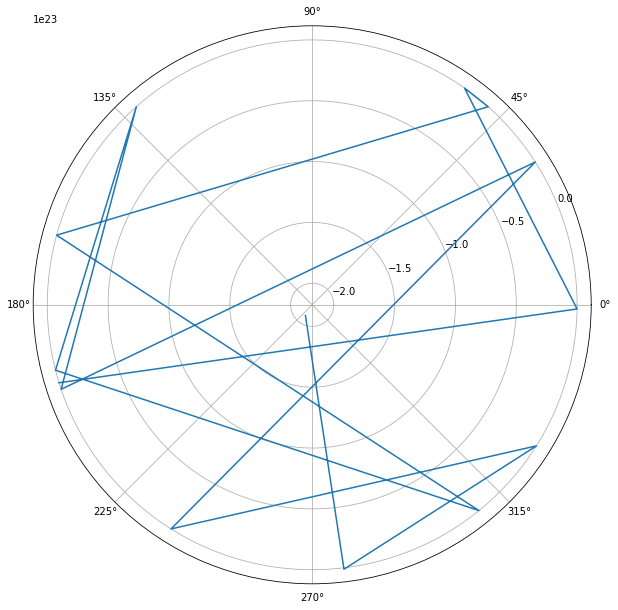

In [474]:
plt.figure(figsize=(10,20))
plt.polar(paramsR[0],paramsT[0])
plt.show()

In [475]:
def X(r,t):
    return r*np.cos(t)
def Y(r,t):
    return r*np.sin(t)

/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sin
  after removing the cwd from sys.path.
/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cos
  


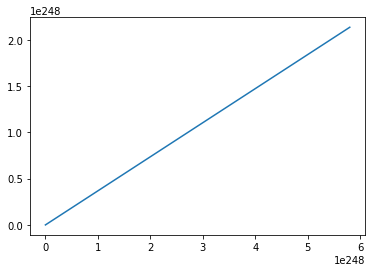

In [476]:
plt.plot(Y(paramsR[1],paramsT[1]),X(paramsR[1],paramsT[1]))

In [414]:
X(paramsR[0][-1],paramsT[0][-1])

129557399671.95447

In [417]:
X(paramsR[0][0],paramsT[0][0])

129557400406.15202

In [420]:
paramsR[0][-1]-paramsR[0][0]

-9324.3408203125